In [2]:
import fastf1
from fastf1 import plotting
from fastf1 import utils
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
import datetime as dt
import pandas as pd
import numpy as np

In [4]:
# Enable the cache
fastf1.Cache.enable_cache('cache')
# Load the session data
session = fastf1.get_session(2022, 'Saudi Arabia', 'FP2')
# Collect all race laps
laps = session.load()
laps = session.laps

core           INFO 	Loading data for Saudi Arabian Grand Prix - Practice 2 [v2.2.1]
api            INFO 	No cached data found for driver_info. Loading data...
api            INFO 	Fetching driver list...
api            INFO 	Data has been written to cache!
core        WARNING 	Failed to load data from Ergast API! (This is expected for recent sessions)
api            INFO 	No cached data found for timing_data. Loading data...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_app_data. Loading data...
api            INFO 	Fetching timing app data...
api            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
api            INFO 	No cached data found for session_status_data. Loading data...
api            INFO 	Fetching session status data...
api            INFO 	Data has been written to cache!
api        

In [7]:
# Get laps of the drivers
driver1 = 'LEC'
driver2 = 'VER'
laps_1 = laps.pick_driver(driver1)
laps_2 = laps.pick_driver(driver2)
# Extract the fastest laps
fastest_1 = laps_1.pick_fastest()
fastest_2 = laps_2.pick_fastest()

In [8]:
fastest_1

Time                      0 days 00:57:26.071000
DriverNumber                                  16
LapTime                   0 days 00:01:30.074000
LapNumber                                     10
Stint                                          2
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:32.876000
Sector2Time               0 days 00:00:28.923000
Sector3Time               0 days 00:00:28.275000
Sector1SessionTime        0 days 00:56:28.873000
Sector2SessionTime        0 days 00:56:57.796000
Sector3SessionTime        0 days 00:57:26.071000
SpeedI1                                    281.0
SpeedI2                                    318.0
SpeedFL                                    295.0
SpeedST                                    323.0
Compound                                    SOFT
TyreLife                                     4.0
FreshTyre                                   True
LapStartTime        

In [9]:
# Get telemetry from fastest laps
telemetry_1 = fastest_1.get_car_data().add_distance()
telemetry_2 = fastest_2.get_car_data().add_distance()

In [10]:
delta, ref_tel, compare_tel = utils.delta_time(fastest_1,fastest_2)

In [11]:
#abs(round(delta[len(delta)-1], 3))

t=fastest_1.LapTime-fastest_2.LapTime
#pd.Timedelta(t)
deltat=t.total_seconds()

if deltat < 0:
    speed_text = f"{fastest_1.Driver} {abs(deltat)} s faster than {fastest_2.Driver}"
else: 
    speed_text = f"{fastest_2.Driver} {abs(deltat)} s faster than {fastest_1.Driver}"

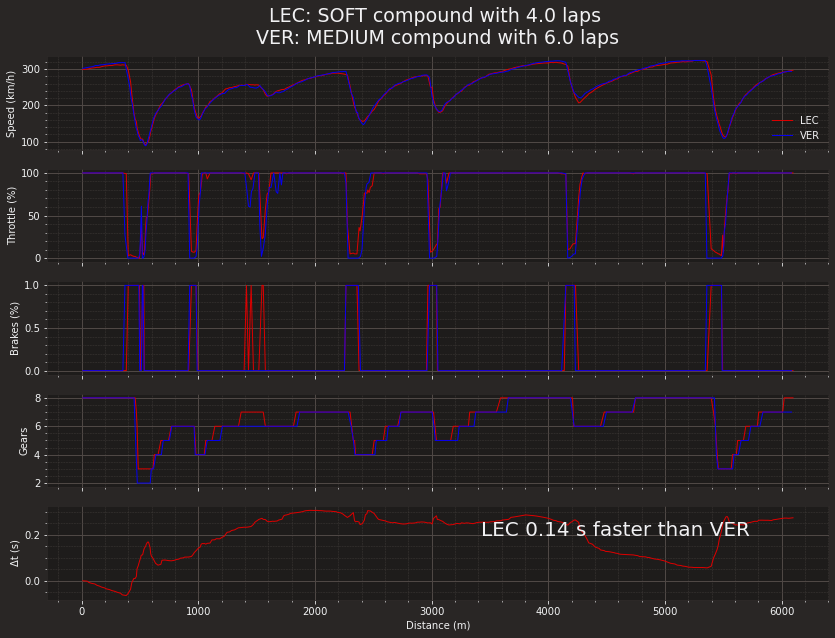

In [25]:
color1 = plotting.team_color(fastest_1['Team'])
color2 = plotting.team_color(fastest_2['Team'])

plotting.setup_mpl()
#plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(5,figsize=(14, 10))
#fig.suptitle(f'{driver1} VS {driver2} lap comparison with soft tyres', fontsize=20)
ax[0].set_title(f'{fastest_1.Driver}: {fastest_1.Compound} compound with {fastest_1.TyreLife} laps \n {fastest_2.Driver}: {fastest_2.Compound} compound with {fastest_2.TyreLife} laps ')
ax[0].plot(telemetry_1['Distance'], telemetry_1['Speed'], label=fastest_1.Driver, color=color1, linewidth=1)
ax[0].plot(telemetry_2['Distance'], telemetry_2['Speed'], label=fastest_2.Driver, color=color2, linewidth=1)
ax[0].set(ylabel='Speed (km/h)')
#ax[0].set_facecolor('grey')
ax[0].legend(loc="lower right", facecolor='grey', frameon=False)
ax[1].plot(telemetry_1['Distance'], telemetry_1['Throttle'], label=fastest_1.Driver, color=color1, linewidth=1)
ax[1].plot(telemetry_2['Distance'], telemetry_2['Throttle'], label=fastest_2.Driver, color=color2, linewidth=1)
ax[1].set(ylabel='Throttle (%)')
#ax[1].set_facecolor('grey')
ax[2].plot(telemetry_1['Distance'], telemetry_1['Brake'], label=fastest_1.Driver, color=color1, linewidth=1)
ax[2].plot(telemetry_2['Distance'], telemetry_2['Brake'], label=fastest_2.Driver, color=color2, linewidth=1)
ax[2].set(ylabel='Brakes (%)')
#ax[2].set_facecolor('grey')
ax[3].plot(telemetry_1['Distance'], telemetry_1['nGear'], label=fastest_1.Driver, color=color1, linewidth=1)
ax[3].plot(telemetry_2['Distance'], telemetry_2['nGear'], label=fastest_2.Driver, color=color2, linewidth=1)
ax[3].yaxis.set_ticks(np.arange(2, 10, 2.0))
ax[3].set(ylabel='Gears')
#ax[3].set_facecolor('grey')
ax[4].plot(telemetry_1['Distance'], delta[0:len(telemetry_1)], color=np.where(delta > 0, color1, color2)[len(telemetry_1)], linewidth=1)
ax[4].text(telemetry_1['Distance'][200], delta.mean(), speed_text, fontsize = 20)
ax[4].set(ylabel=f'\u0394t (s)')
#ax[4].set_facecolor('grey')
ax[4].set(xlabel='Distance (m)')
#ax[4].yaxis.set_ticks(np.arange(0, -1, -0.2))
# Hide x labels and tick labels for top plots and y ticks for right plots.
for a in ax.flat:
    a.label_outer()

plt.savefig('telemetry.png', dpi=300)
plt.show()

In [19]:
# Get telemetry data
#x = fastest_1.telemetry.loc[fastest_1.telemetry.Source=='car'].X             # values for x-axis
#y = fastest_1.telemetry.loc[fastest_1.telemetry.Source=='car'].Y             # values for y-axis
x = fastest_1.telemetry['X']
y = fastest_1.telemetry['Y']
color = fastest_2.telemetry['Speed']-fastest_1.telemetry['Speed']    
#color = delta#laps_1.telemetry.nGear#      # value to base color gradient on
colormap = mpl.cm.coolwarm

In [20]:
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

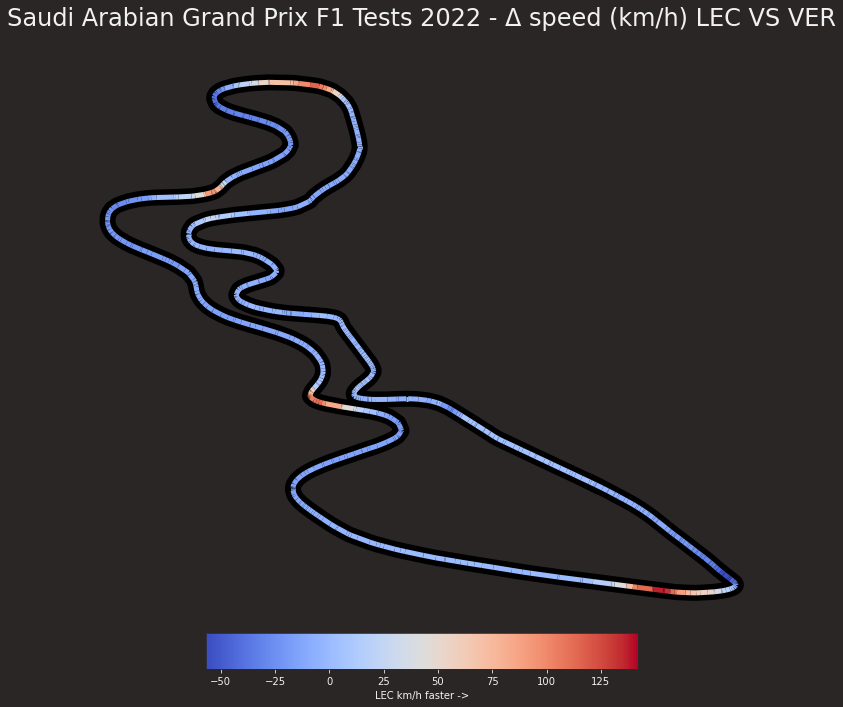

In [23]:
# We create a plot with title and adjust some setting to make it look good.
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 10))
fig.suptitle(f'{session.event.EventName} F1 Tests 2022 - \u0394 speed (km/h) {driver1} VS {driver2}', size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

# After this, we plot the data itself.
# Create background track line
ax.plot(x, y, color='black', linestyle='-', linewidth=16, zorder=0)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(color.min(), color.max())
lc = LineCollection(segments, cmap=colormap, norm=norm, linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(color)

# Merge all line segments together
line = ax.add_collection(lc)

# Finally, we create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap, orientation="horizontal", 
                                   label=np.where(delta > 0, f'{driver1} km/h faster ->', f'{driver2} km/h faster ->')[len(telemetry_1)])

# Show the plot
plt.savefig('delta map.png', dpi=300)
plt.show()